3.6.9
0.01735925481181356
0.0212020253488722


NameError: name 'sigma' is not defined

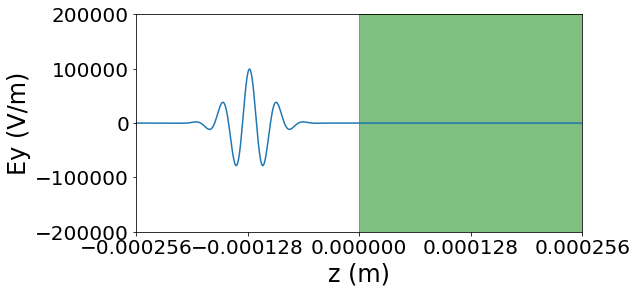

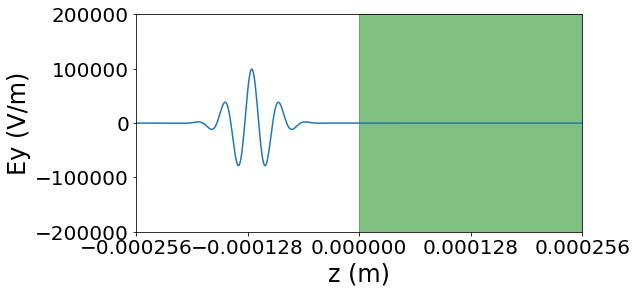

In [9]:
# Import statements
from platform import python_version
print(python_version())
import yt ; 
yt.funcs.mylog.setLevel(50)
import numpy as np
import scipy.constants as scc
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 24
import math
#%matplotlib notebook
iteration = 5
dt_iter = 5
while iteration < 15 :
    ds = yt.load( './diags/diag1'+str(iteration).zfill(5) ) # Create a dataset object\n",
    ad0 = ds.covering_grid(level=0, left_edge=ds.domain_left_edge, dims=ds.domain_dimensions)
    xCell = ds.domain_dimensions[0]
    yCell = ds.domain_dimensions[1]
    zCell = ds.domain_dimensions[2]
    z_array = ad0['z'].to_ndarray()
    Ey_array = ad0['Ey'].to_ndarray()
    plt.figure(figsize=(8,4))
    plt.plot(z_array[int(xCell/2),int(yCell/2),:]-z_array[int(xCell/2),int(yCell/2),int(zCell/2)],Ey_array[int(xCell/2),int(yCell/2),:])
    plt.ylim(-2e5, 2e5)
    plt.xlim(-256e-6, 256.000001e-6)
    plt.xticks(np.arange(-256.e-6, 256.000001e-6, step=128.e-6))
    plt.xlabel('z (m)')
    plt.ylabel('Ey (V/m)')
    max_Ey = max(Ey_array[int(xCell/2), int(yCell/2), int(zCell/2):zCell])
    print(max_Ey)
    plt.axvspan(0.e-6, 256.e-6, color='green', alpha=0.5)
    plt.savefig(str(iteration).zfill(5)+'.png',bbox_inches = "tight")
    iteration = iteration +dt_iter
    
wavelength = 32.e-6
mu0 = 4*math.pi*1.e-7
epsilon0 = 8.86e-12
c0 = 1/math.sqrt(mu0*epsilon0)
omega = 2*math.pi*c0/wavelength
gamma = 1j*omega*math.sqrt(mu0*epsilon0)*math.sqrt(1-1j*sigma/omega/epsilon)
print(c0)